In [2]:
import matplotlib.pyplot as plt
#import OpenEphys as oe
import numpy as np#
import pandas as pd
import os
% matplotlib notebook


MAX_NUMBER_OF_EVENTS = int(1e6)

In [3]:
working_directory = 'F:/NeuropixelData/2019-07-19_10-04-20'
path = os.path.join(working_directory,'experiment1/recording1/events/Neuropix-PXI-100.0/TTL_1')

In [4]:
channel_states = np.load(os.path.join(path,'channel_states.npy'))
timestamps = np.load(os.path.join(path,'timestamps.npy'))
channels = np.load(os.path.join(path,'channels.npy'))

In [5]:
timestamps_on = (timestamps[channel_states==1])/30000

In [12]:
def clean_up(working_directory,timestamps, fail = None):
    if fail != None:
        timestamps = np.delete(timestamps, [fail])
    
    wd_tmp = os.path.join(working_directory,'NationalInstruments')
    
    data_dir = [f for f in os.listdir(wd_tmp) if 'sweepParameter' in f]
    #print(data_dir)
    count = 0

    for i in data_dir:
        if 'sweepParameter' in i:
            count += 1
        else:
            count = count
    print(count)
    trials = []
    ids = []
    ts_dict = {}
    for i in range(count):

        path_tmp = os.path.join(wd_tmp,data_dir[i])
        metaData_tmp = pd.read_pickle(path_tmp)
        trials.append(len(metaData_tmp)*2)
        ids.append(data_dir[i][:4])

    if timestamps.shape[0] != sum(trials):
        print('Corrupted timestamps....')

        plt.plot(np.diff(timestamps),'o-')
        #plt.plot((timestamps-timestamps[0]),'o-')
        plt.show()

       
    else:

        for i in range(count):
            ts_dict[ids[i]] = timestamps[:trials[i]]
            timestamps = np.delete(timestamps, [range(trials[i])])    
    return timestamps,ts_dict

## for deleting timestamps use ts+1 // ts = first wrong ts


In [39]:
#timestamps_off,ts_dict_off = clean_up(working_directory,timestamps_off,fail = 404)
timestamps_on,ts_dict_on = clean_up(working_directory,timestamps_on,fail = 280)


2


In [40]:
ids = list(ts_dict_on.keys())

In [41]:
ids

['001_', '002_']

In [42]:
ts_dict_on['002_'].size

280

In [50]:
wd_tmp = os.path.join(working_directory,'NationalInstruments')
    
data_dir = [f for f in os.listdir(wd_tmp) if not '.npy' in f]
    #print(data_dir)
count = 0

for i in data_dir:
    if 'sweepParameter' in i:
        count += 1
    else:
        count = count

In [51]:
data_dir

['001_2019-07-19_10-04-32_sweepParameter',
 '002_2019-07-19_10-53-20_sweepParameter',
 'AI_files_001',
 'AI_files_002']

In [52]:
sweepParameters_path = []
inputData_path = []
for i in range(count):
    sweepParameters_path.append(os.path.join(wd_tmp,data_dir[i]))
    inputData_path.append(os.path.join(wd_tmp,data_dir[count+(i)],'temp_AI.npy'))
    

In [53]:
sweepParameters_path

['F:/NeuropixelData/2019-07-19_10-04-20\\NationalInstruments\\001_2019-07-19_10-04-32_sweepParameter',
 'F:/NeuropixelData/2019-07-19_10-04-20\\NationalInstruments\\002_2019-07-19_10-53-20_sweepParameter']

In [54]:
inputData_path

['F:/NeuropixelData/2019-07-19_10-04-20\\NationalInstruments\\AI_files_001\\temp_AI.npy',
 'F:/NeuropixelData/2019-07-19_10-04-20\\NationalInstruments\\AI_files_002\\temp_AI.npy']

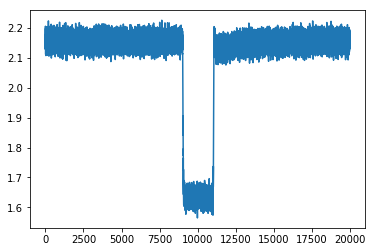

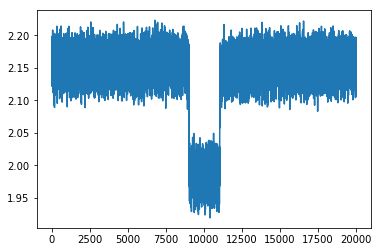

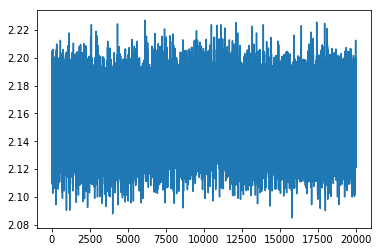

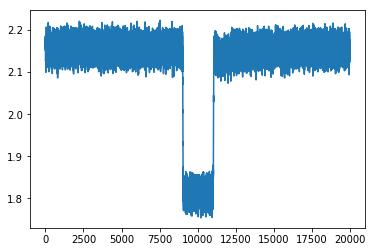

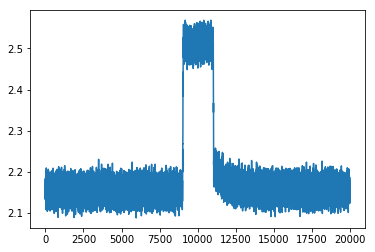

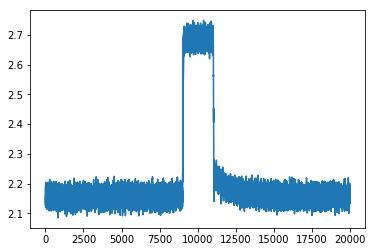

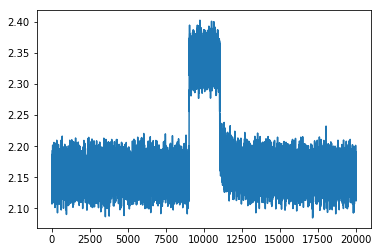

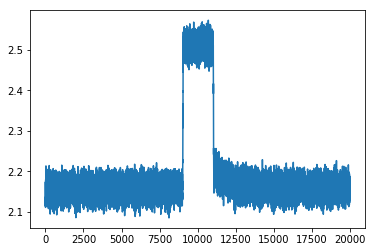

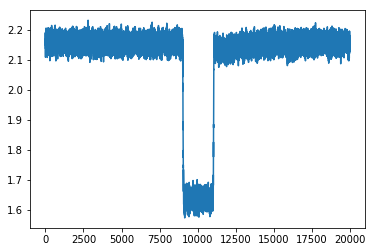

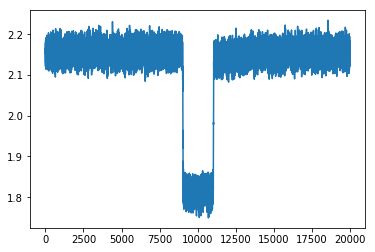

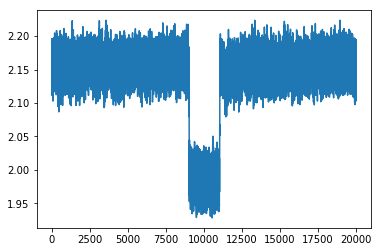

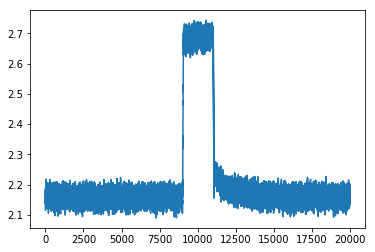

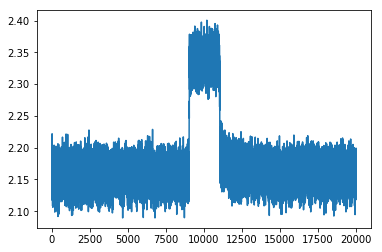

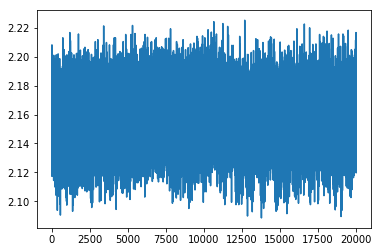

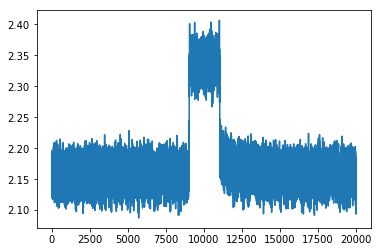

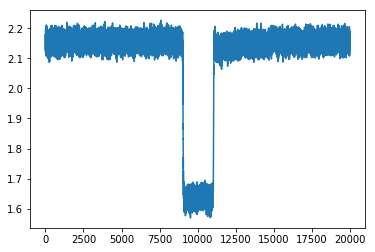

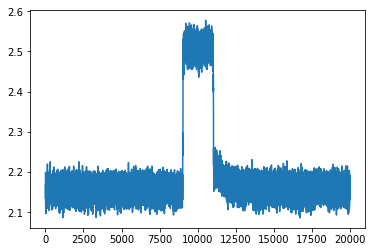

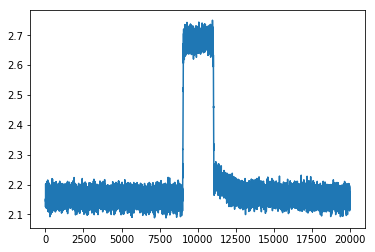

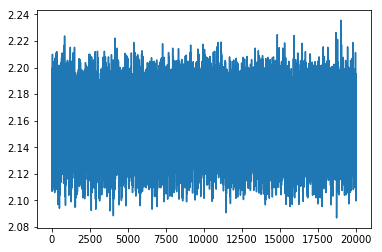

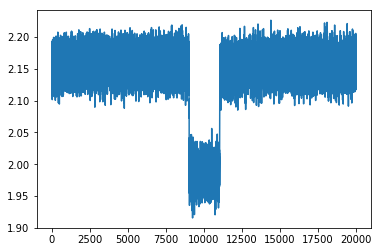

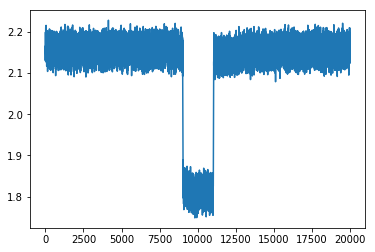

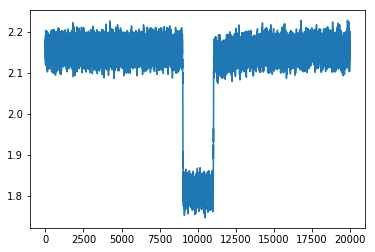

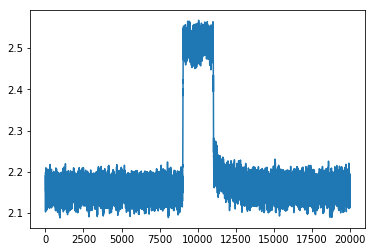

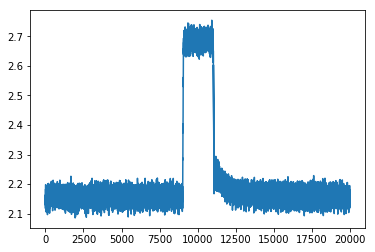

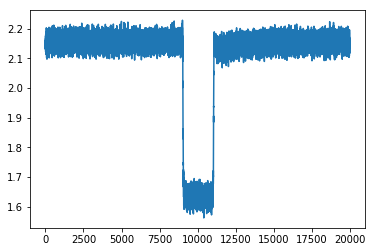

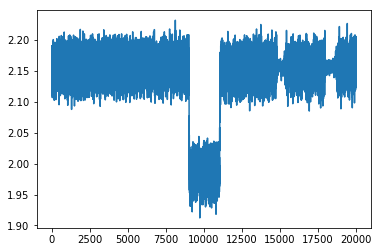

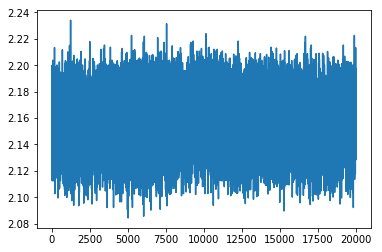

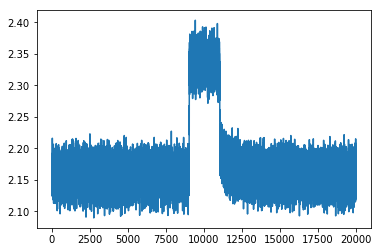

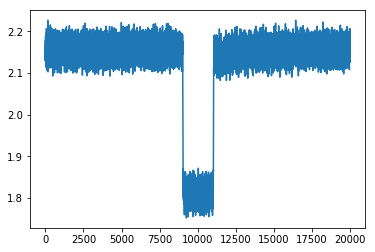

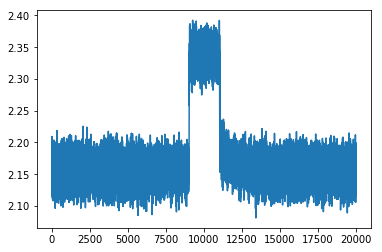

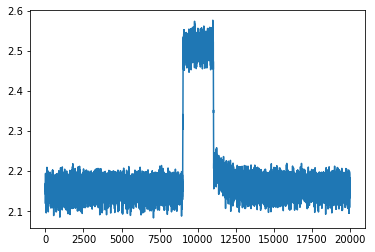

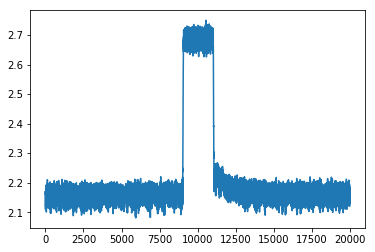

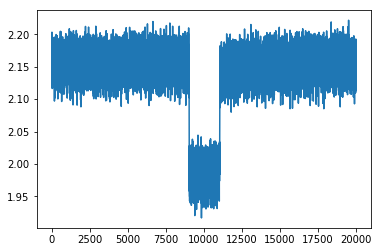

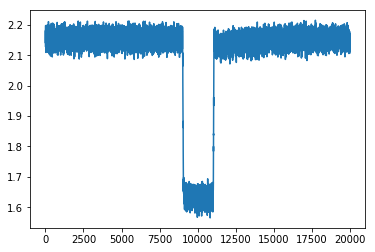

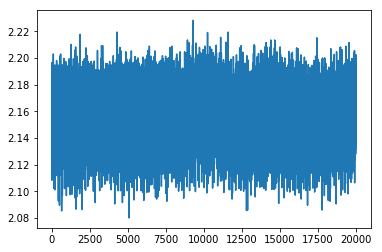

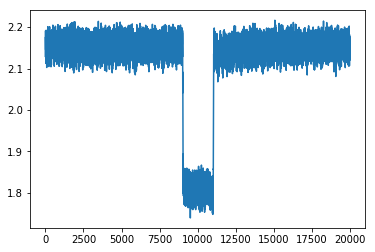

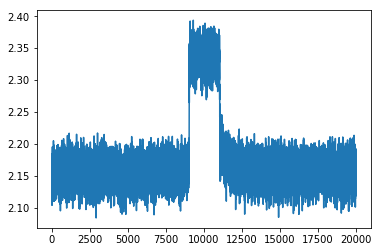

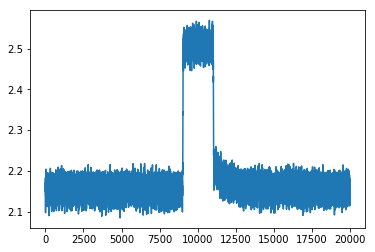

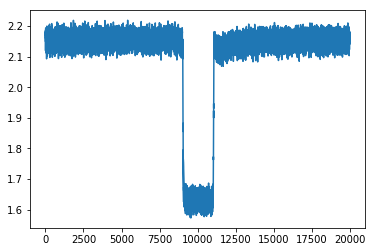

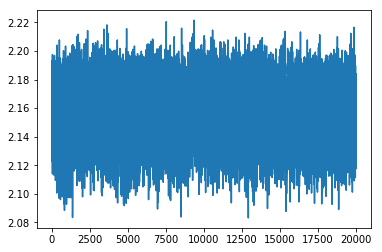

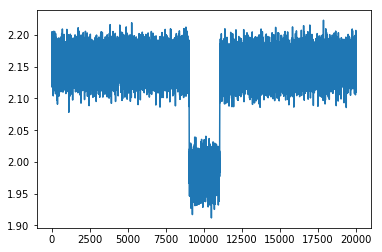

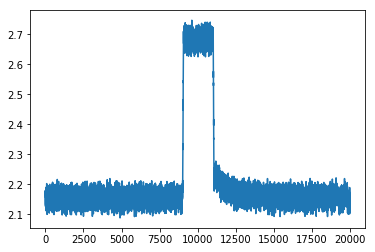

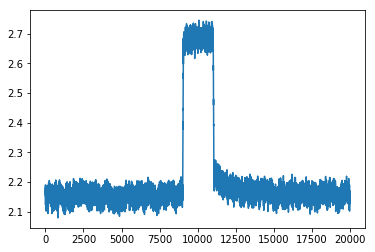

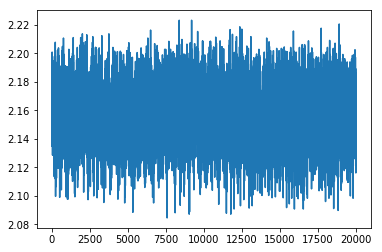

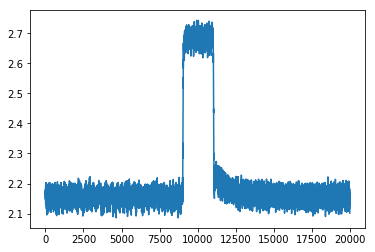

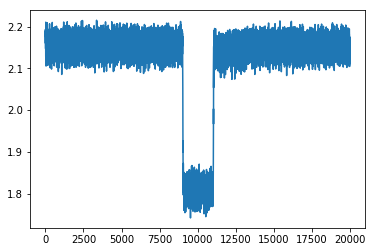

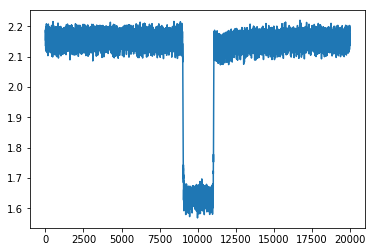

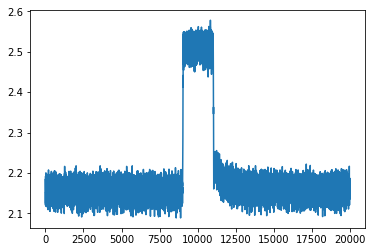

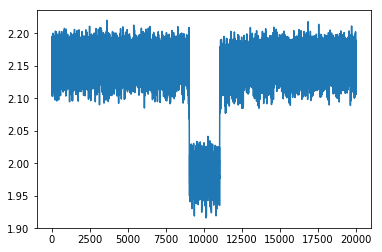

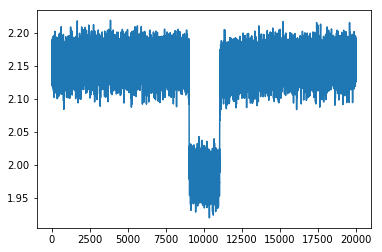

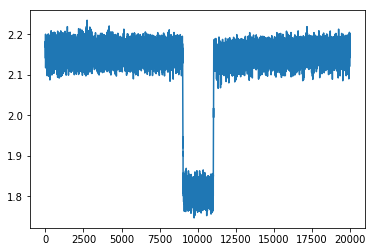

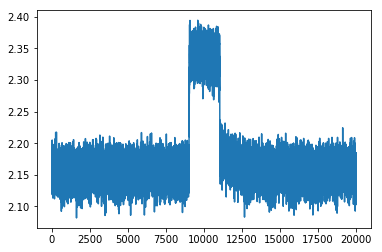

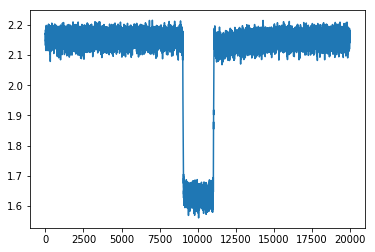

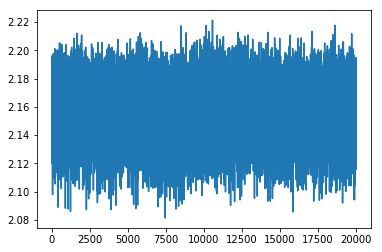

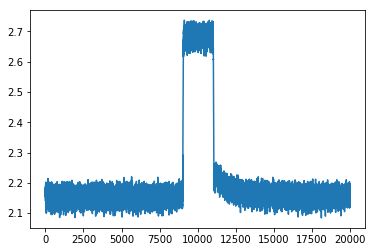

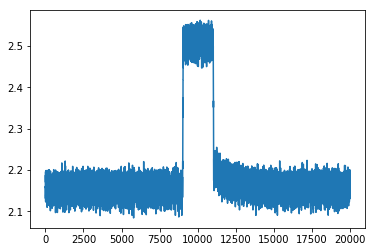

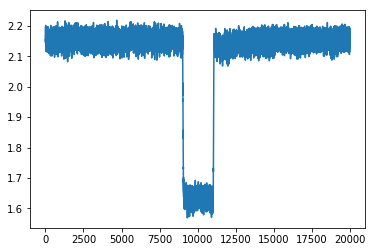

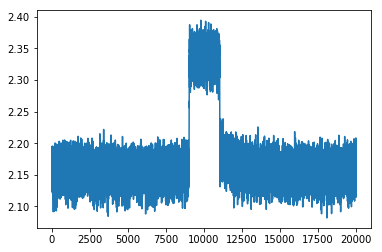

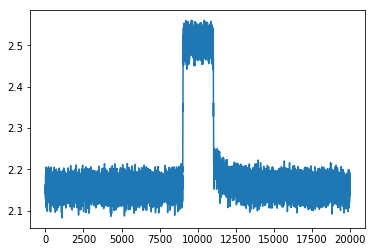

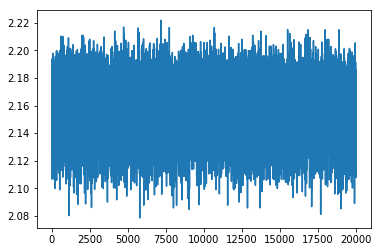

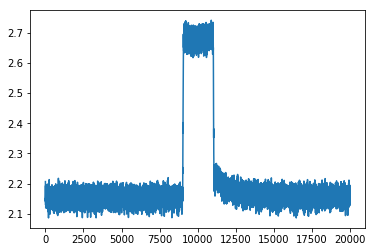

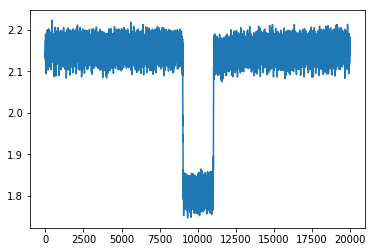

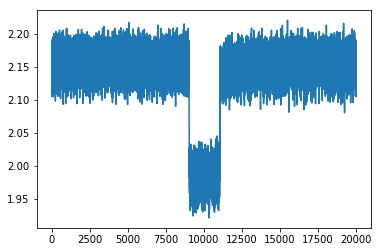

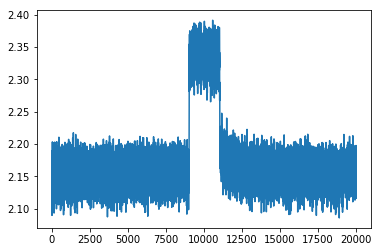

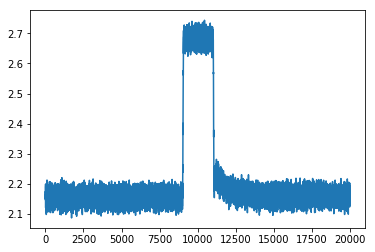

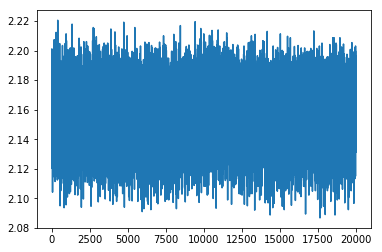

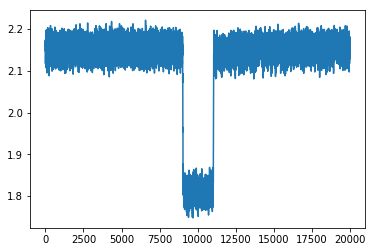

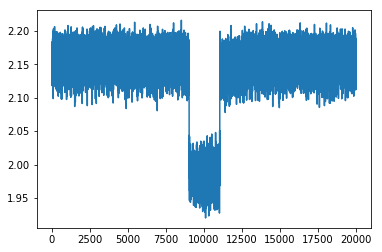

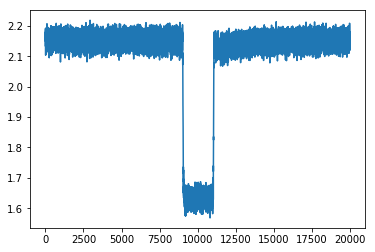

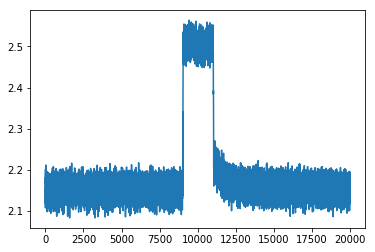

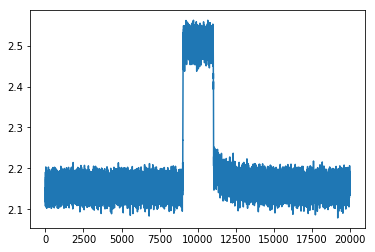

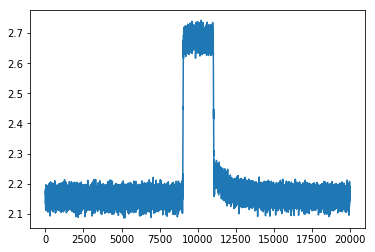

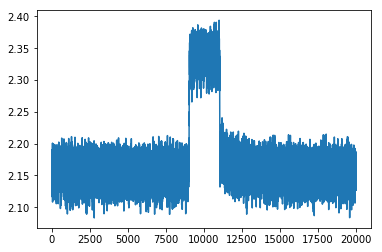

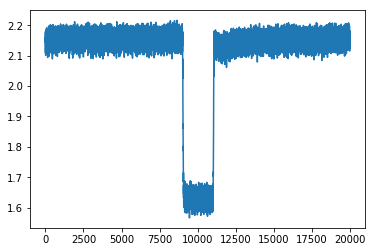

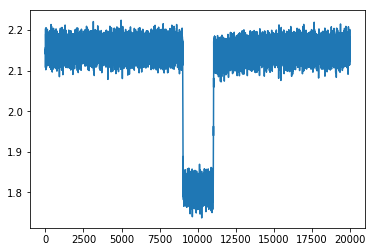

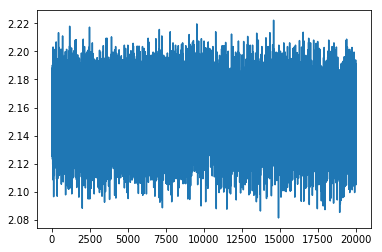

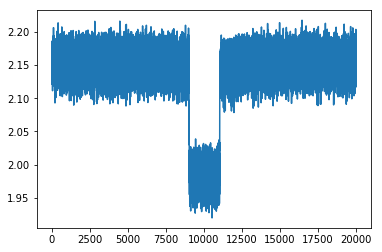

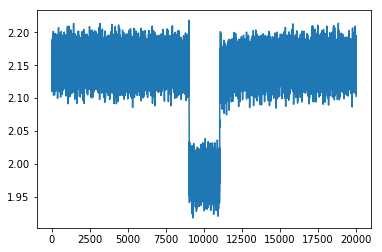

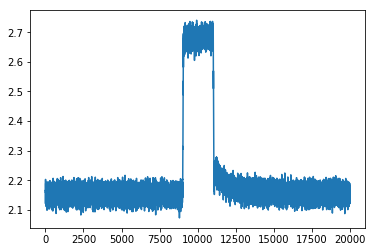

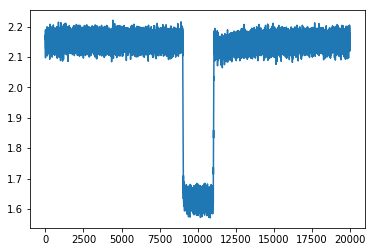

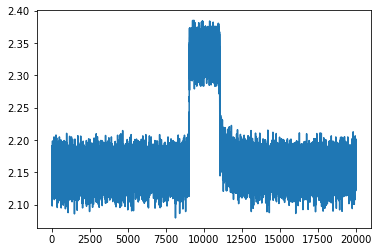

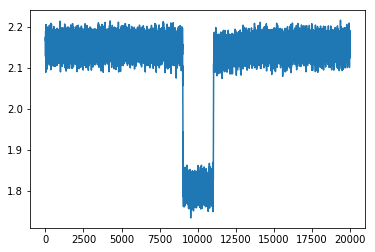

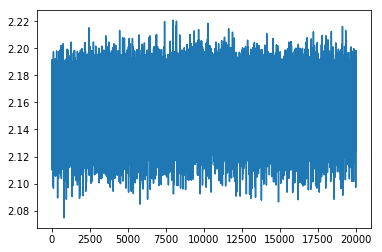

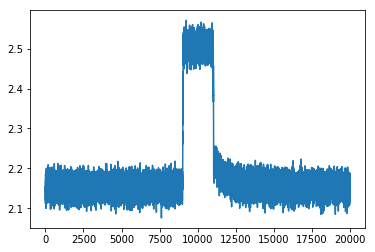

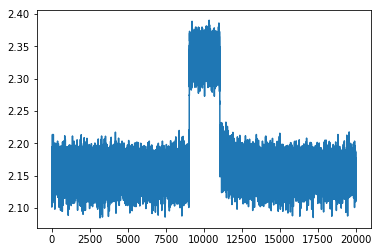

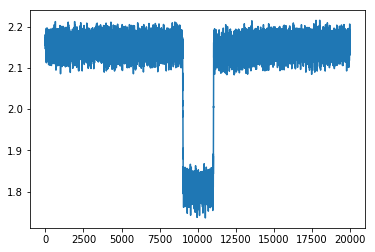

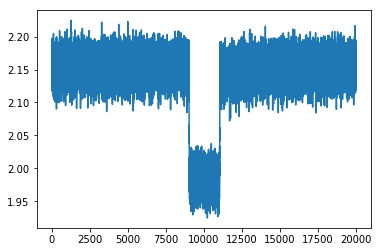

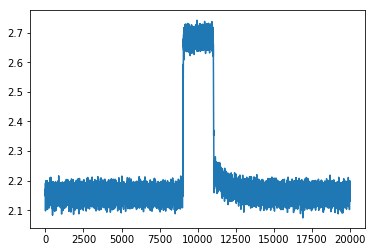

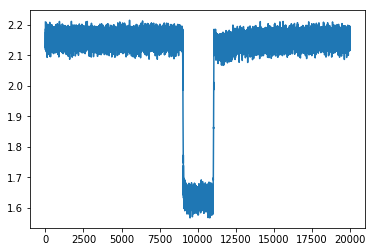

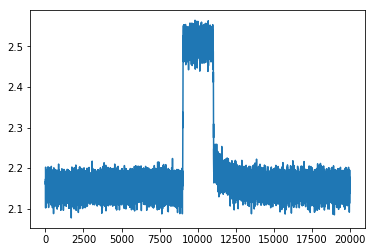

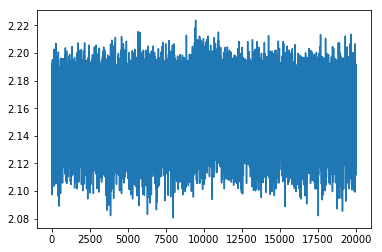

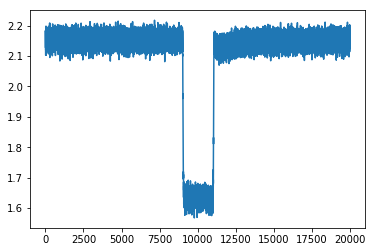

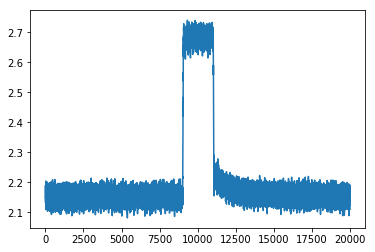

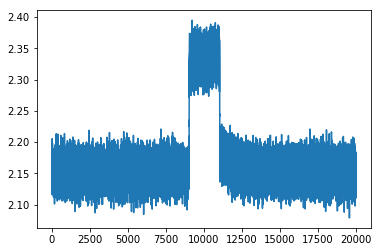

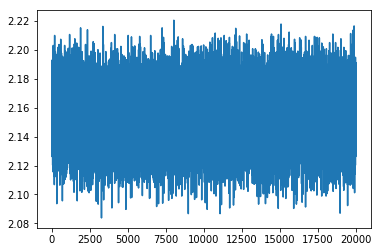

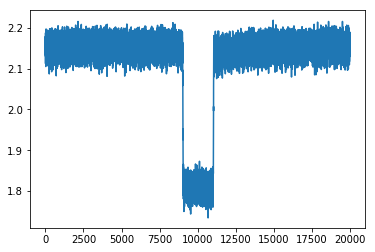

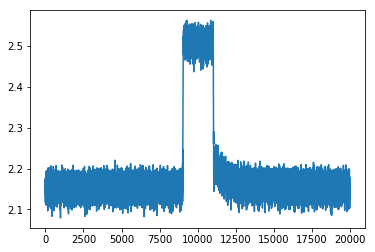

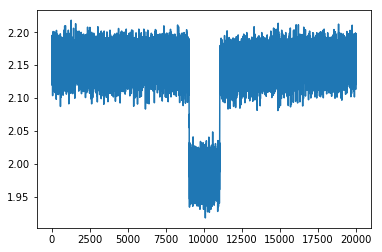

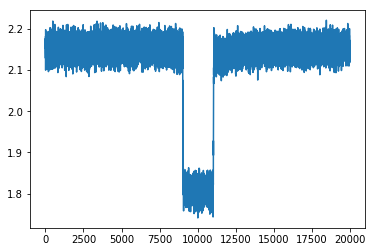

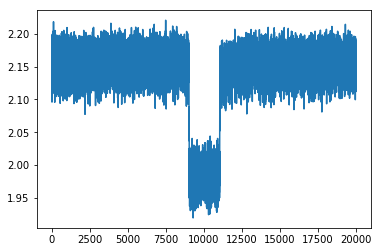

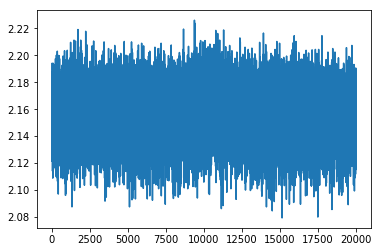

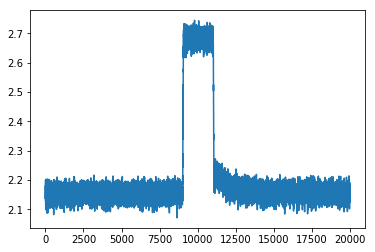

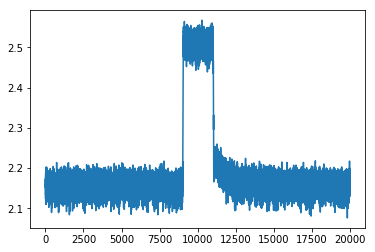

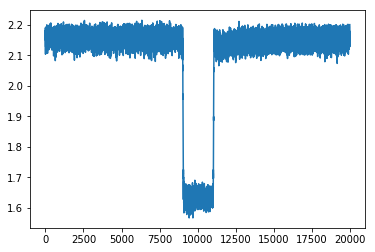

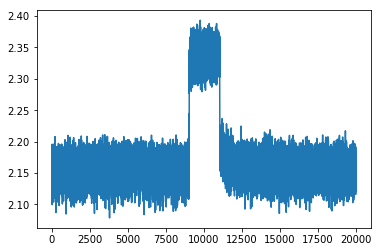

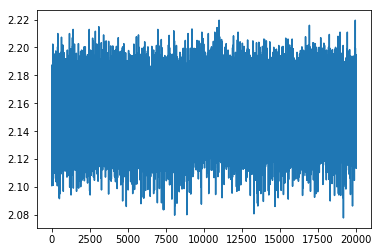

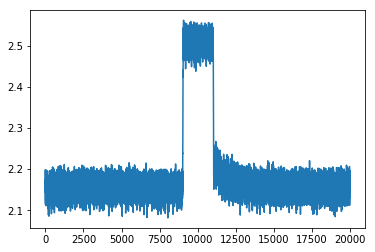

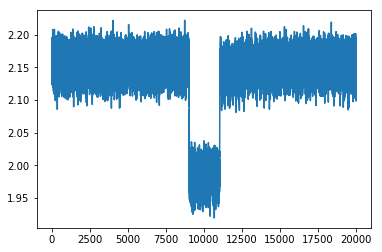

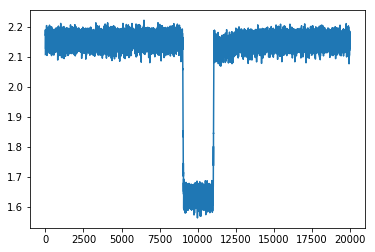

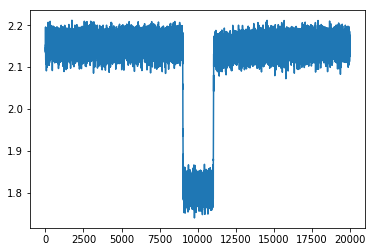

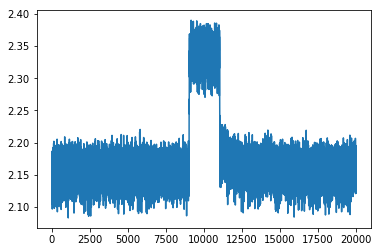

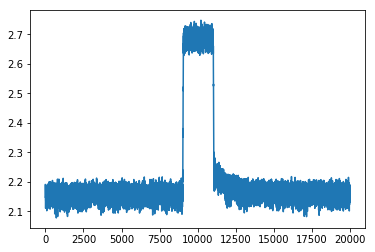

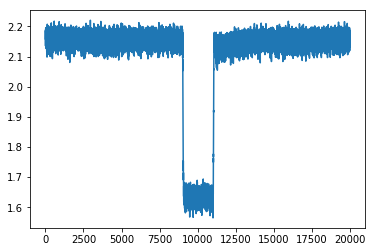

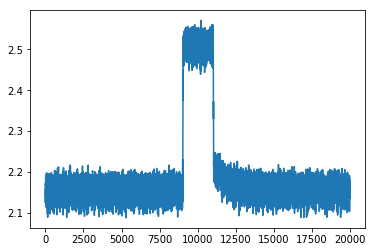

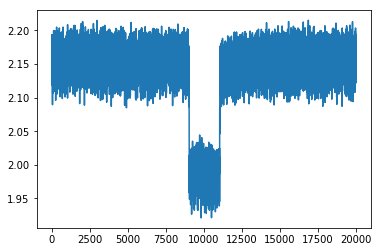

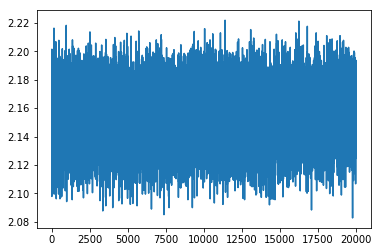

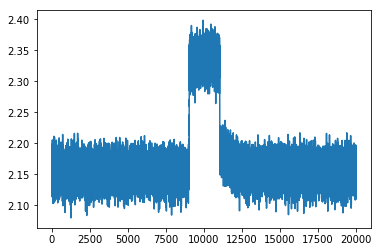

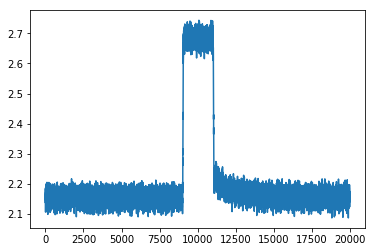

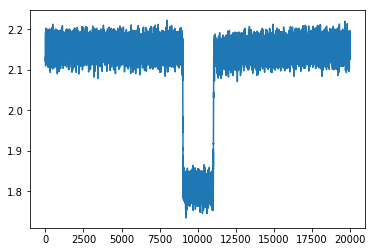

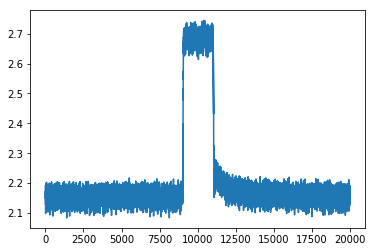

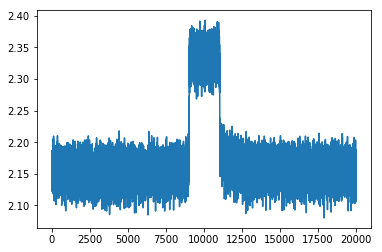

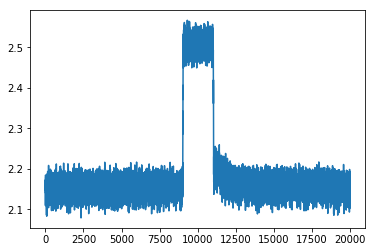

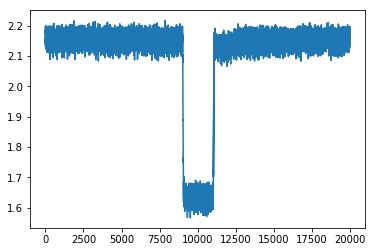

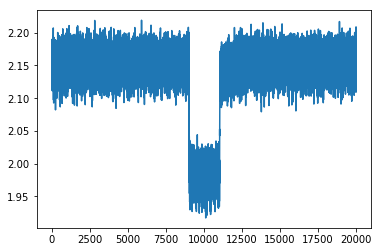

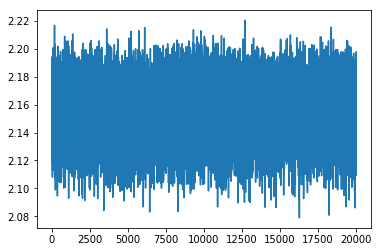

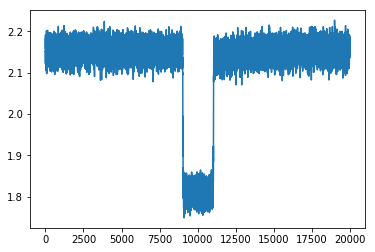

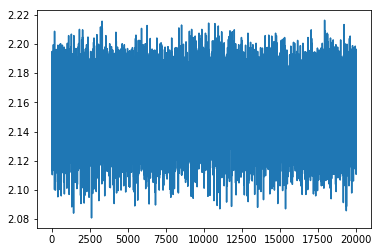

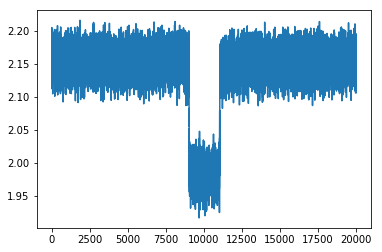

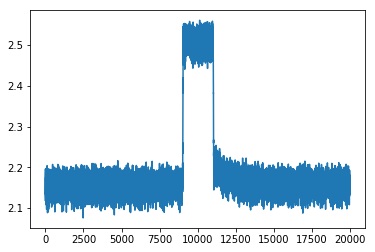

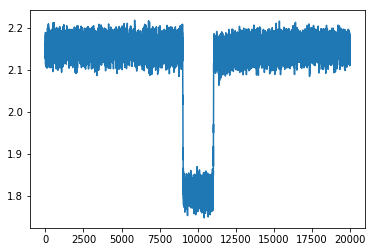

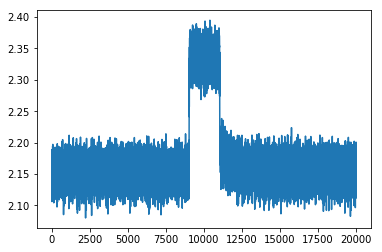

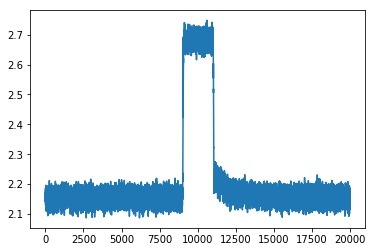

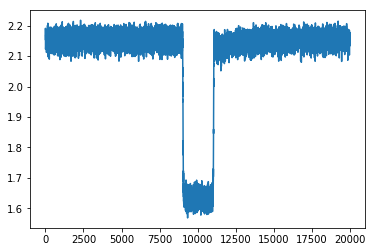

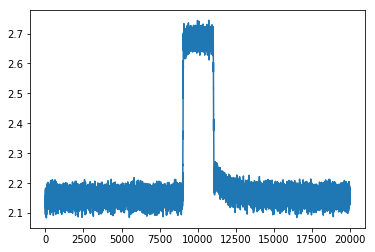

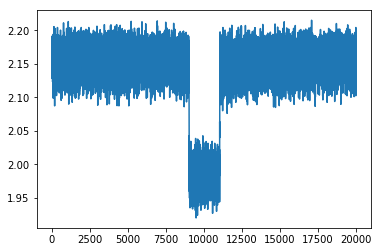

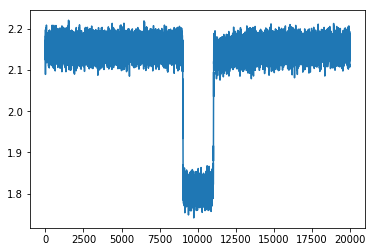

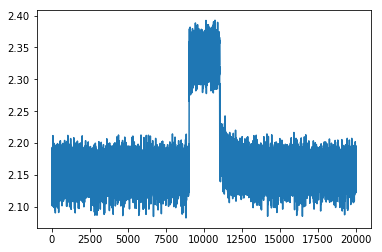

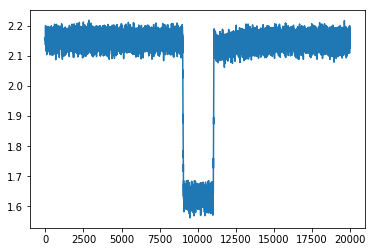

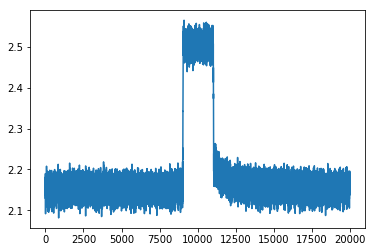

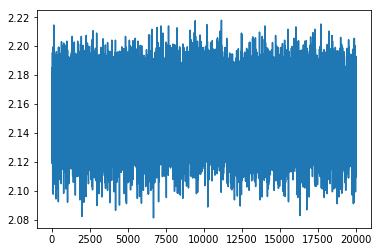

In [56]:
% matplotlib inline
input_Data = np.load(inputData_path[0])
feedback = input_Data[2,:,:]
    
for i in range(140):
    plt.plot(feedback[:,i])
    plt.show()

In [154]:
metaData = pd.read_pickle(sweepParameters_path[1])
metaData

,Trials,Baseline Temp,Stimulus Temp,Samplingrate,Sweeplength,Pre Stimulus Time,Stimulus Duration,Repititions,ID,sweepID
0,140,2.6,3.5,1000,22,9,4,20,002,6.0
1,140,2.6,2.6,1000,22,9,4,20,002,3.0
2,140,2.6,2.3,1000,22,9,4,20,002,2.0
3,140,2.6,2.9,1000,22,9,4,20,002,4.0
4,140,2.6,3.2,1000,22,9,4,20,002,5.0
5,140,2.6,2.0,1000,22,9,4,20,002,1.0
6,140,2.6,1.7,1000,22,9,4,20,002,0.0
7,140,2.6,2.9,1000,22,9,4,20,002,4.0
8,140,2.6,1.7,1000,22,9,4,20,002,0.0
9,140,2.6,2.0,1000,22,9,4,20,002,1.0


In [71]:
for i in range(2):
    metaData = pd.read_pickle(sweepParameters_path[i])
    
    pre = metaData['Pre Stimulus Time'][0]
    post = metaData['Sweeplength'][0] - metaData['Stimulus Duration'][0]
    repetion = metaData['Repititions'][0]
    sweepIDs = np.unique(metaData['sweepID'])
    sweeplength = metaData['Sweeplength'][0]
    
    if ids[i] != 'T001':
        
        input_Data = np.load(inputData_path[i])
        feedback_1 = input_Data[2,:,:]
        feedback_2 = input_Data[3,:,:]
        feedback_force = input_Data[1,:,:]
    
    ts_sweepstart = ts_dict_on[ids[i]][::2]
    #ts_sweepstart = ts_sweepstart -1
    ts_stimstart = ts_dict_on[ids[i]][1::2]
    #ts_stimstart = ts_stimstart -4
    
    
    Data = {}
    Data['Timestamps'] = {}
    Data['Feedback_1'] = {}
    Data['Feedback_2'] = {}
    Data['Feedback_Force'] = {}

    for ii in range(len(sweepIDs)):
        Data['Timestamps'][str(ii) + '_sweepstart'] = ts_sweepstart[metaData['sweepID'] == float(ii)]
        Data['Timestamps'][str(ii) + '_stimstart'] = ts_stimstart[metaData['sweepID'] == float(ii)]
        if ids[i] != 'T001':
            Data['Feedback_1'][str(ii) + '_feedback'] = feedback_1[:,np.where(metaData['sweepID'] == float(ii))]
            Data['Feedback_2'][str(ii) + '_feedback'] = feedback_2[:,np.where(metaData['sweepID'] == float(ii))]
            Data['Feedback_Force'][str(ii) + '_feedback_force'] = feedback_force[:,np.where(metaData['sweepID'] == float(ii))]
    stimData = pd.DataFrame.from_dict(Data,orient = 'columns')
    stimData.to_pickle(wd_tmp+'/'+ids[i]+'stimData.pkl')

<IPython.core.display.Javascript object>


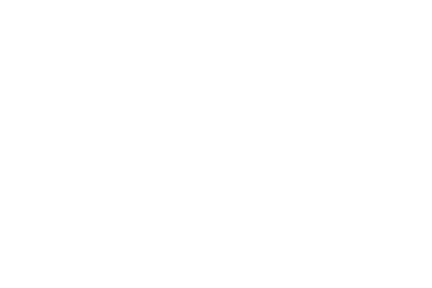

<IPython.core.display.Javascript object>


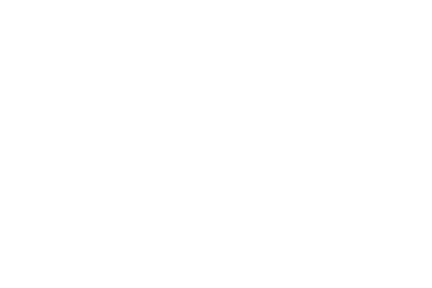

In [100]:
matplotlib notebook 
for i in range(6):
    plt.plot(np.mean(stimData['Feedback_1']['{}_feedback'.format(i)][:,0,:],axis=1))
plt.show()

In [101]:
metaData

,Trials,Baseline Temp,Stimulus Temp,Samplingrate,Sweeplength,Pre Stimulus Time,Stimulus Duration,Repititions,ID,sweepID
0,140,26.0,17.0,1000,20,9,2,20,002,0.0
1,140,26.0,23.0,1000,20,9,2,20,002,2.0
2,140,26.0,32.0,1000,20,9,2,20,002,5.0
3,140,26.0,26.0,1000,20,9,2,20,002,3.0
4,140,26.0,29.0,1000,20,9,2,20,002,4.0
5,140,26.0,35.0,1000,20,9,2,20,002,6.0
6,140,26.0,20.0,1000,20,9,2,20,002,1.0
7,140,26.0,23.0,1000,20,9,2,20,002,2.0
8,140,26.0,29.0,1000,20,9,2,20,002,4.0
9,140,26.0,20.0,1000,20,9,2,20,002,1.0
